<a href="https://colab.research.google.com/github/tade0726/DL-2021S2/blob/main/re_implemented_fundamentals_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1, Deep Learning Fundamentals 2021




In [1]:
# prepare libs

! pip install pytorch-lightning

     |████████████████████████████████| 919 kB 5.4 MB/s 
     |████████████████████████████████| 282 kB 41.1 MB/s 
     |████████████████████████████████| 119 kB 43.1 MB/s 
     |████████████████████████████████| 636 kB 36.6 MB/s 
     |████████████████████████████████| 829 kB 30.4 MB/s 
     |████████████████████████████████| 1.3 MB 26.3 MB/s 
     |████████████████████████████████| 294 kB 48.2 MB/s 
     |████████████████████████████████| 142 kB 47.0 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=4bd8457aae82185a1b122b743ca32d75ef4edb2b9b0a94d1ccf6a0244b8530e0
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data download

In [3]:
import requests
from joblib import Memory
from sklearn.datasets import load_svmlight_file
from os.path import join

mem = Memory("./mycache")

def download_file(url, save_path):
  r = requests.get(url, allow_redirects=True)
  with open(save_path, "wb") as file:
    file.write(r.content)
  return save_path

@mem.cache
def get_data(file_path):
    data = load_svmlight_file(file_path)
    return data[0], data[1]

In [4]:
# config and meta data

data = {
    "raw": "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes",
    "scale": "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"
}


data_dir = "./drive/MyDrive/Colab_Notebooks/Uni/2021S2/DL/DL-asset-1/data"
model_dir = "./drive/MyDrive/Colab_Notebooks/Uni/2021S2/DL/DL-asset-1/model"

data_file_paths  = {}
download_needed = False

In [5]:
if download_needed:
  for k, url in data.items():
    r = download_file(url, join(data_dir, f"diabetes_{k}"))
    data_file_paths[k] = r
else:
  data_file_paths = {
      "raw": join(data_dir, "diabetes_raw"),
      "scale": join(data_dir, "diabetes_scale")

  }

In [6]:
data_store = {}

for k, p in data_file_paths.items():
  X, y = get_data(p)
  data_store[k] = (X, y)

________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-3c9a0cb28b44>.get_data...
get_data('./drive/MyDrive/Colab_Notebooks/Uni/2021S2/DL/DL-asset-1/data/diabetes_raw')
_________________________________________________________get_data - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--content-<ipython-input-3c9a0cb28b44>.get_data...
get_data('./drive/MyDrive/Colab_Notebooks/Uni/2021S2/DL/DL-asset-1/data/diabetes_scale')
_________________________________________________________get_data - 0.2s, 0.0min


## A Perceptron Build from scratch 

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
import math


class Perceptron:

    def __init__(self, lr, iteration_num: int):

        self.lr = lr
        self.iteration_num = iteration_num

    def binary_step(self, x):
        return np.where(x >= 0, 1, 0)

    def forward(self, x):
        return np.matmul(self.weight, x) + self.bias

    def update(self, x, error):
        self.weight = self.weight - x * error * self.lr
        self.bias = self.bias - self.lr * error

    def fit(self, X, y):

        self.weight = np.random.uniform(low=-1, high=1, size=X.shape[1])
        self.bias = np.random.uniform(low=-1, high=1, size=1)

        for i in range(self.iteration_num):
            for x_, y_ in zip(X, y):
                output = self.forward(x_)
                y_predict = self.binary_step(output)
                error = y_predict - y_
                self.update(x_, error)

    def predict(self, X):

        y = []

        for x in X:
          y_ = self.forward(x)
          y_ = self.binary_step(y_[0]) 
          y.append(y_)

        return np.array(y)

In [8]:
# data prepare
n_X = data_store["scale"][0].toarray()
n_y = data_store["scale"][1]

n_y = np.where(n_y == -1, 0, n_y)

In [18]:
import pandas as pd

s = pd.Series(n_y)

In [23]:
s.value_counts()

1.0    500
0.0    268
dtype: int64

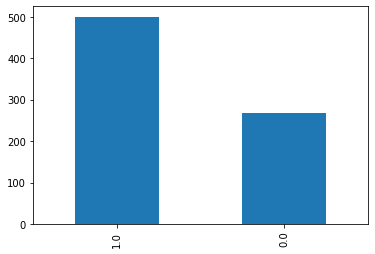

In [22]:
s.value_counts().plot(kind="bar")

In [19]:
# train val test split
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(n_X, n_y, test_size=0.20, random_state=69)
n_X_val, n_X_test, n_y_val, n_y_test = train_test_split(n_X_test, n_y_test, test_size=0.50, random_state=69)

In [24]:
p = Perceptron(lr=0.01, iteration_num=50)

p.fit(n_X_train, n_y_train)

In [25]:
y_val_predict = p.predict(n_X_val)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(n_y_val, y_val_predict))

              precision    recall  f1-score   support

         0.0       0.67      0.46      0.55        26
         1.0       0.76      0.88      0.82        51

    accuracy                           0.74        77
   macro avg       0.71      0.67      0.68        77
weighted avg       0.73      0.74      0.73        77

